In [6]:
import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Load time-lapse data...

In [7]:
filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop_bgrem.tif'
#filename = '/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d_151119-nmy2GFP-tagRfpPH-wt-04_w1LMM_488+488_LP_myTestCrop.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

segchannel = stack[:,1,:,:]
flowchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian_filter(segchannel,sigma)

print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

Stack shape: (20, 2, 368, 337)
Segchannel shape: (20, 368, 337)
Single image: (368, 337)


/Users/jug/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


In [8]:
max_rs = (segchannel[0].shape[1] / 3,
          segchannel[0].shape[0] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (112, 122)


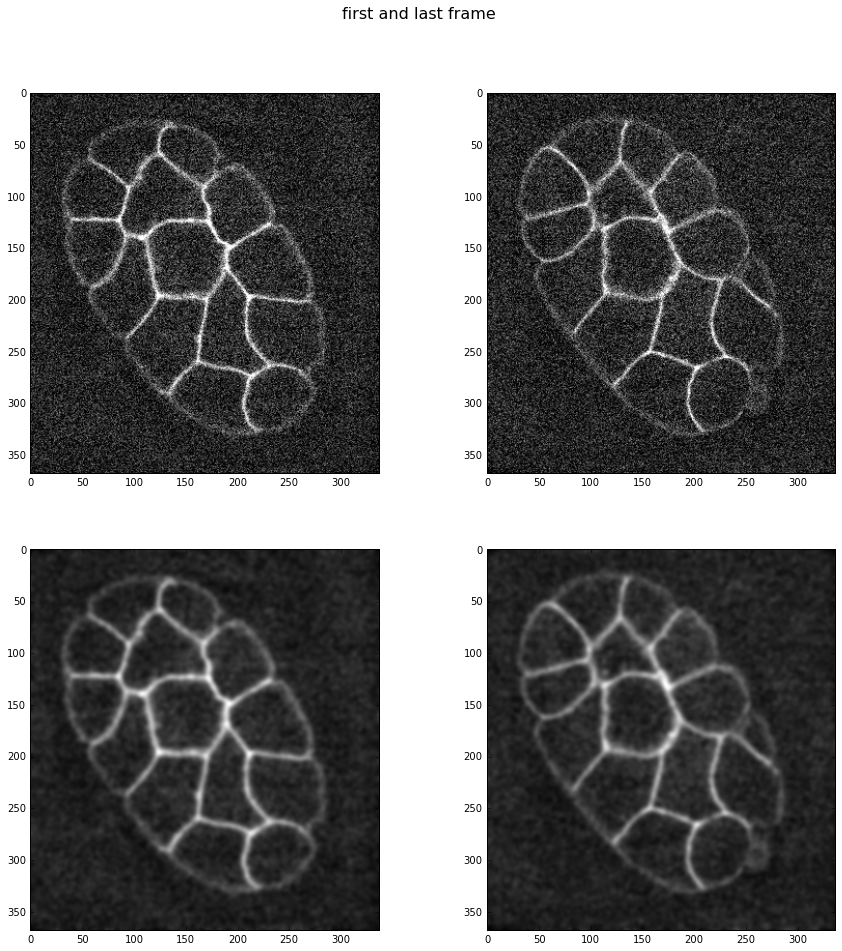

In [9]:
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(segchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(segchannel[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(segchannel_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(segchannel_smooth[-1], plt.get_cmap('gray'))

In [19]:
data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=50,K=100,max_delta_k=8)
objects = []

## adding E cells

In [20]:
Ea = data.init_object("Ea")
objects.append(Ea)

Ep = data.init_object("Ep")
objects.append(Ep)

In [21]:
data.add_object_at( Ea, min_rs, max_rs, frame=0, seed=(150,160), segment_it=True )
data.track(Ea, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ea" in frame 0 with seed coordinates [ 150.  160.]
      Optimum energy:  25.3692140132
      Nodes in/out:  1546 3454
      Area:  4385.0
Added appearance for "Ea" in frame 1 with seed coordinates [ 150.  160.]
      Optimum energy:  24.9977191393
      Nodes in/out:  1564 3436
      Area:  4494.0
    Updated center to [149 160]
Added appearance for "Ea" in frame 2 with seed coordinates [ 149.  160.]
      Optimum energy:  26.2266502348
      Nodes in/out:  1557 3443
      Area:  4490.0
    Updated center to [149 160]
Added appearance for "Ea" in frame 3 with seed coordinates [ 149.  160.]
      Optimum energy:  25.8404851054
      Nodes in/out:  1618 3382
      Area:  4803.0
    Updated center to [148 160]
Added appearance for "Ea" in frame 4 with seed coordinates [ 148.  160.]
      Optimum energy:  25.8887565066
      Nodes in/out:  1622 3378
      Area:  4811.0
    Updated center to [148 160]
Added appearance for "Ea" in frame 5 with seed coordinates [ 148.  

In [22]:
data.add_object_at( Ep, min_rs, max_rs, frame=0, seed=(130,100), segment_it=True )
data.track(Ep, seed_frame=0, target_frames=range(1,len(data.images)), recenter_iterations=1)

Added appearance for "Ep" in frame 0 with seed coordinates [ 130.  100.]
      Optimum energy:  22.5121711842
      Nodes in/out:  1416 3584
      Area:  3886.5
Added appearance for "Ep" in frame 1 with seed coordinates [ 130.  100.]
      Optimum energy:  22.1156307848
      Nodes in/out:  1400 3600
      Area:  3816.0
    Updated center to [127 100]
Added appearance for "Ep" in frame 2 with seed coordinates [ 127.  100.]
      Optimum energy:  22.4225143869
      Nodes in/out:  1383 3617
      Area:  3711.0
    Updated center to [126 101]
Added appearance for "Ep" in frame 3 with seed coordinates [ 126.  101.]
      Optimum energy:  22.612049453
      Nodes in/out:  1379 3621
      Area:  3688.5
    Updated center to [125 101]
Added appearance for "Ep" in frame 4 with seed coordinates [ 125.  101.]
      Optimum energy:  22.9791943977
      Nodes in/out:  1373 3627
      Area:  3641.0
    Updated center to [124 101]
Added appearance for "Ep" in frame 5 with seed coordinates [ 124.  1

# Save / Load 
_Does not work yet_

In [23]:
data.save('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')

In [ ]:
data = Data3d( segchannel, silent=False )
data.load('/Users/jug/Repositories/GIT/BobSeg/TestLapseData2d.pkl')
objects = range(len(data.object_names))

# Visualisation stuff 

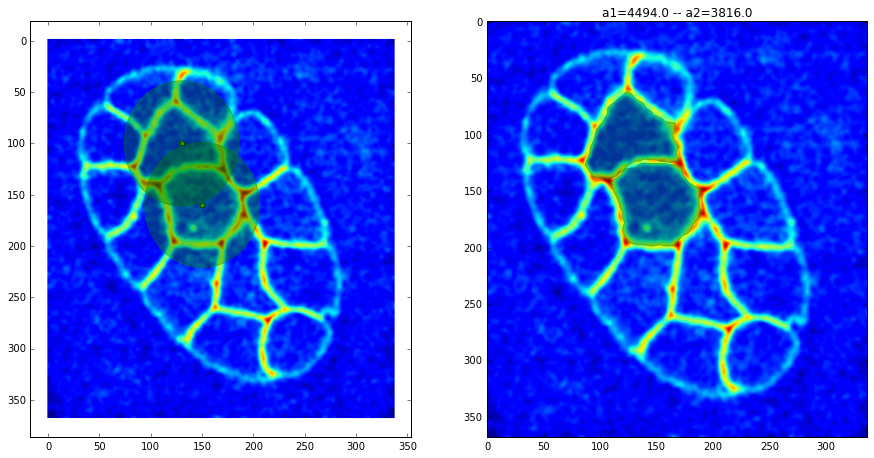

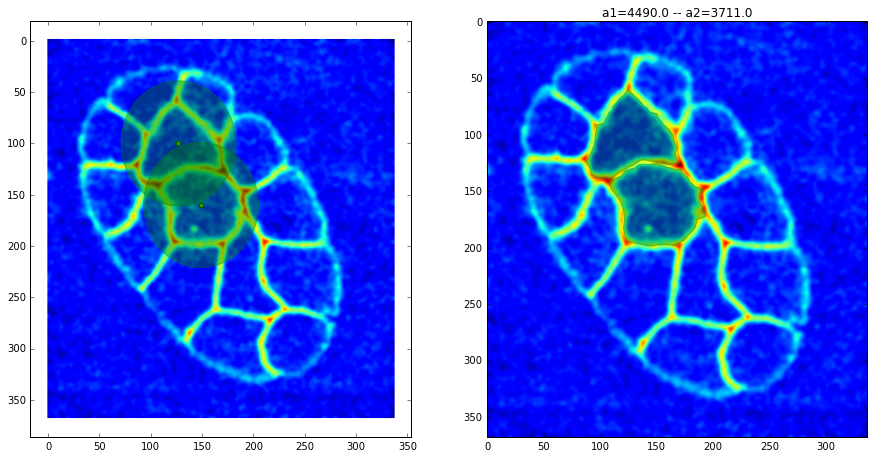

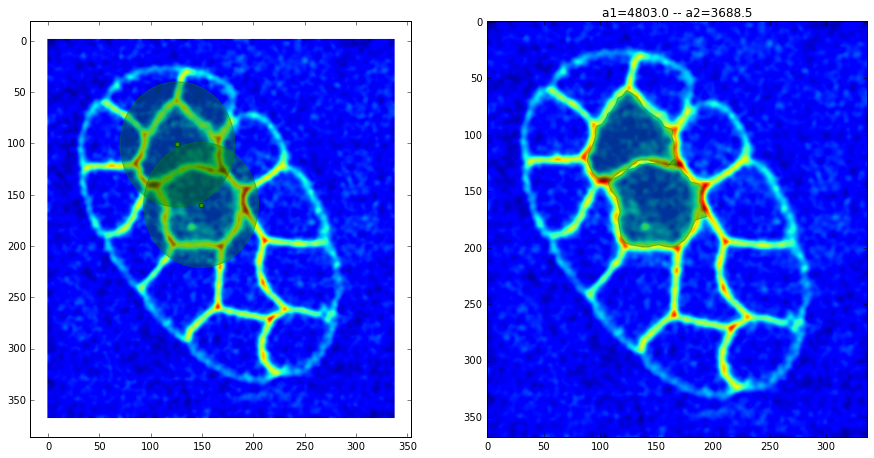

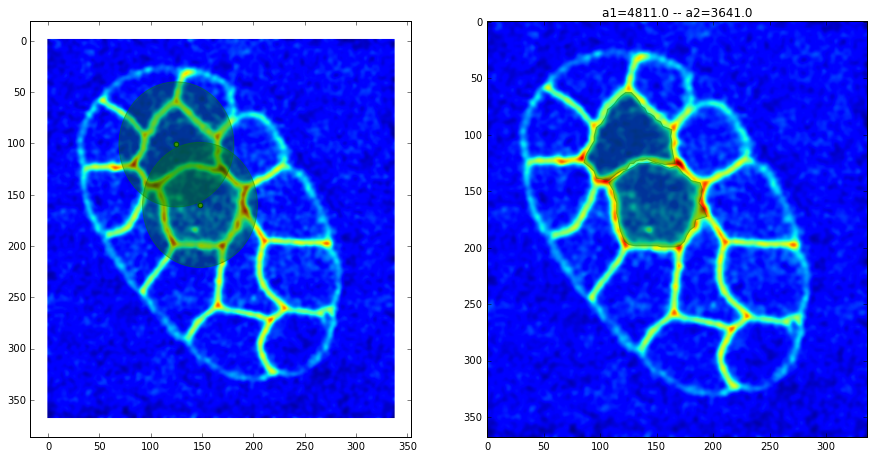

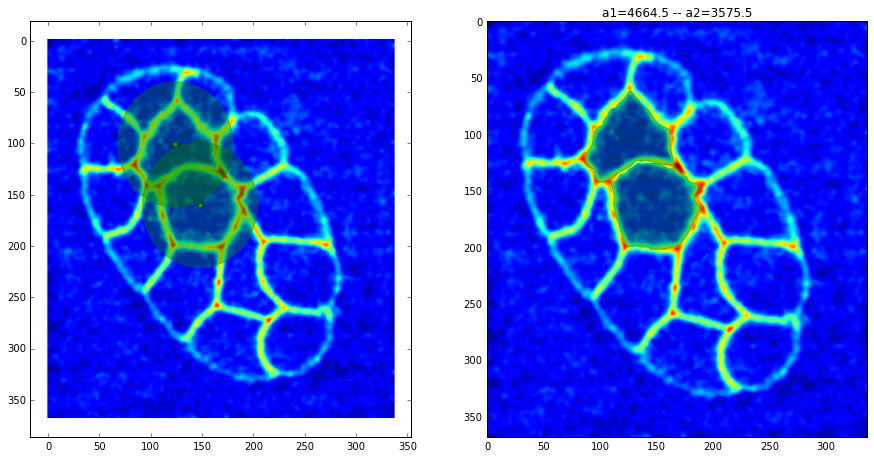

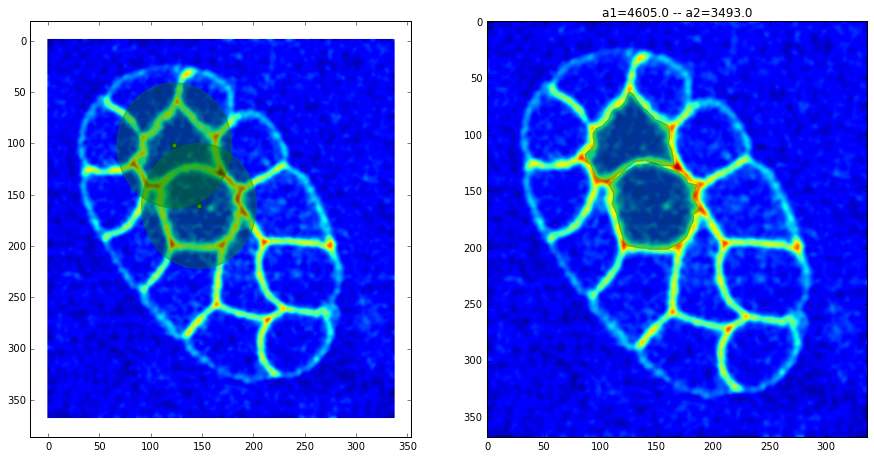

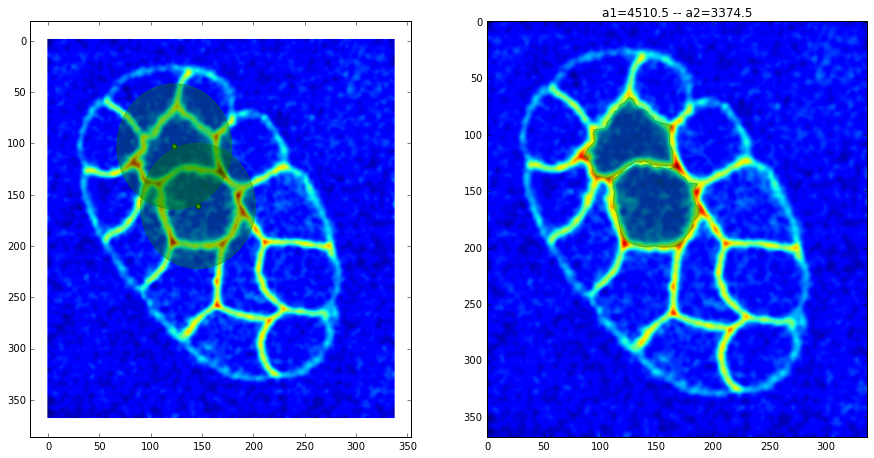

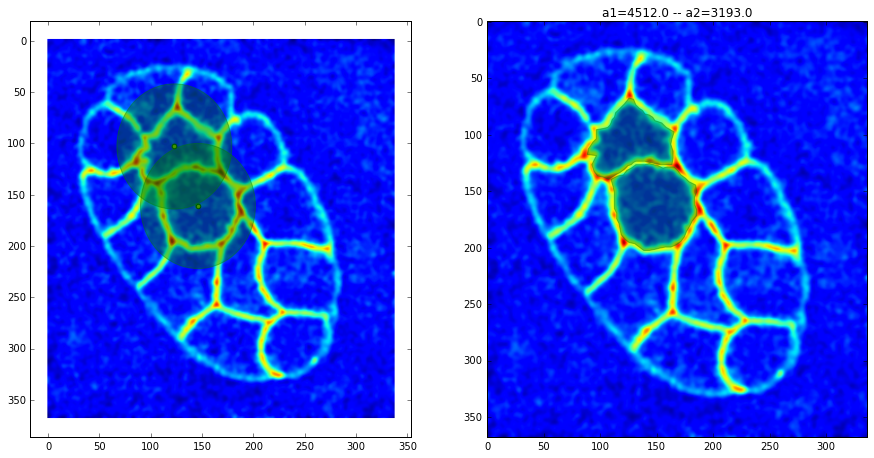

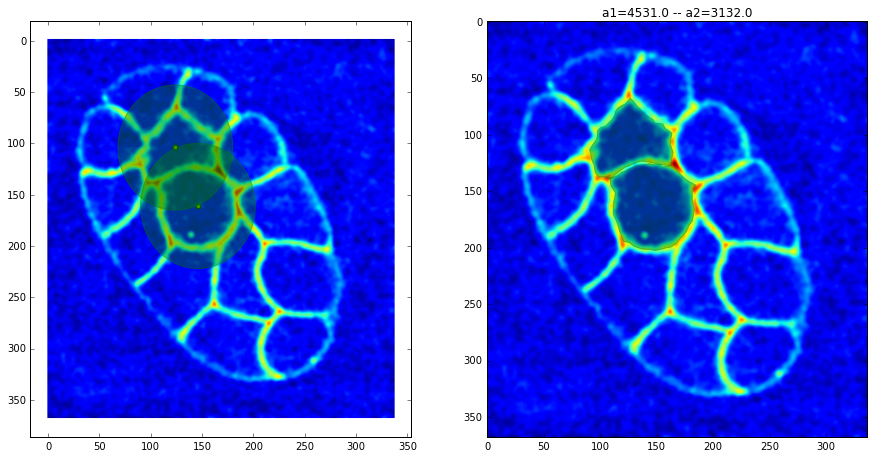

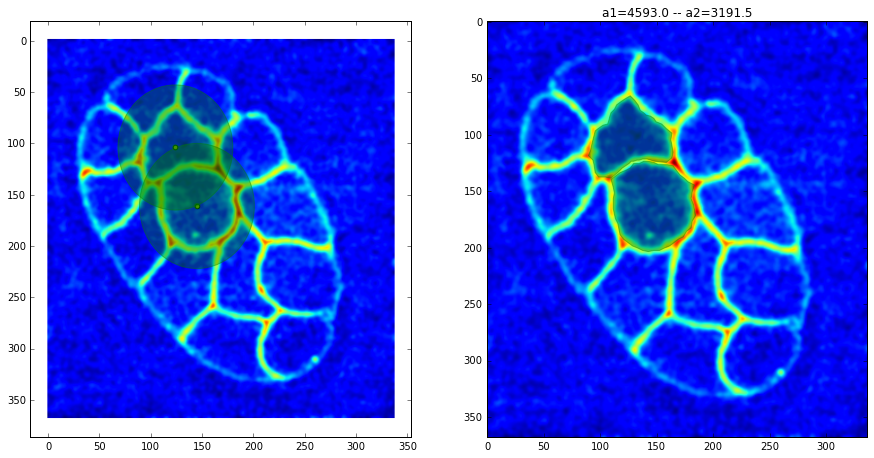

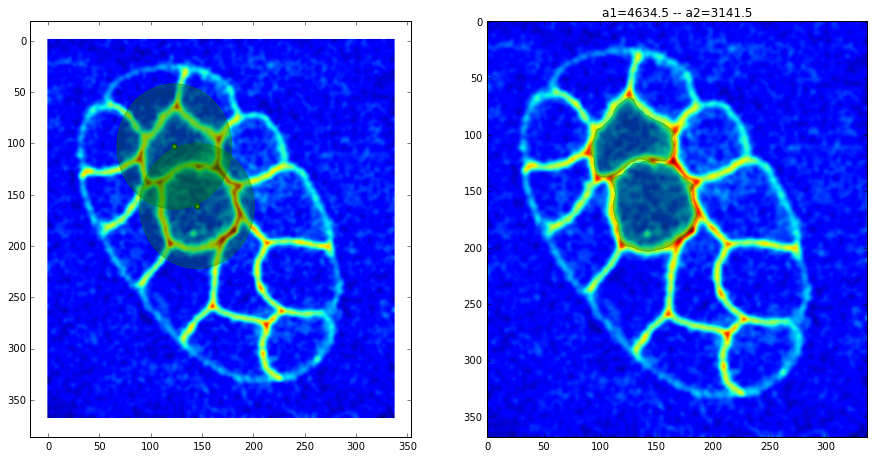

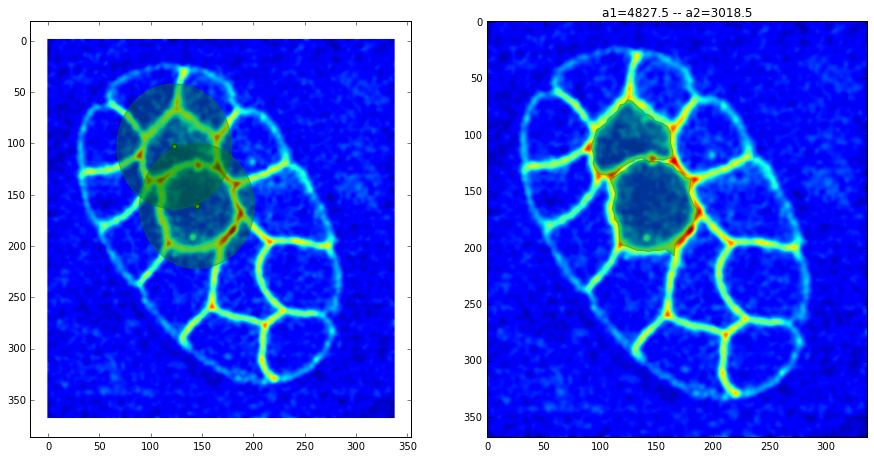

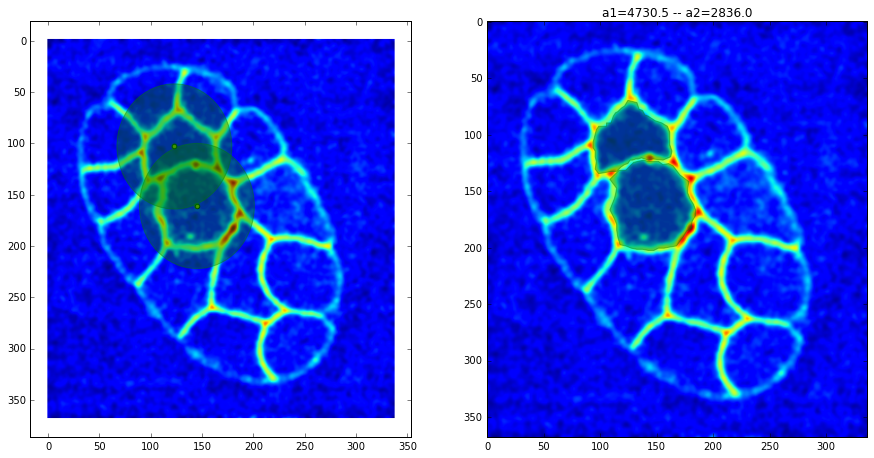

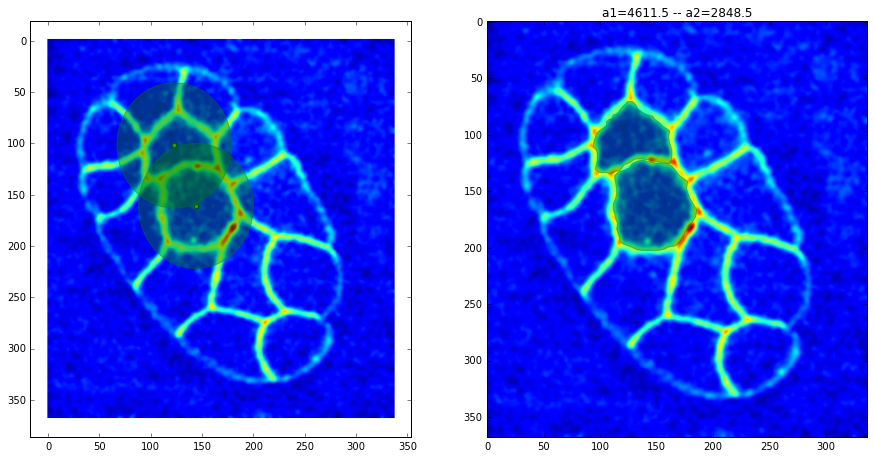

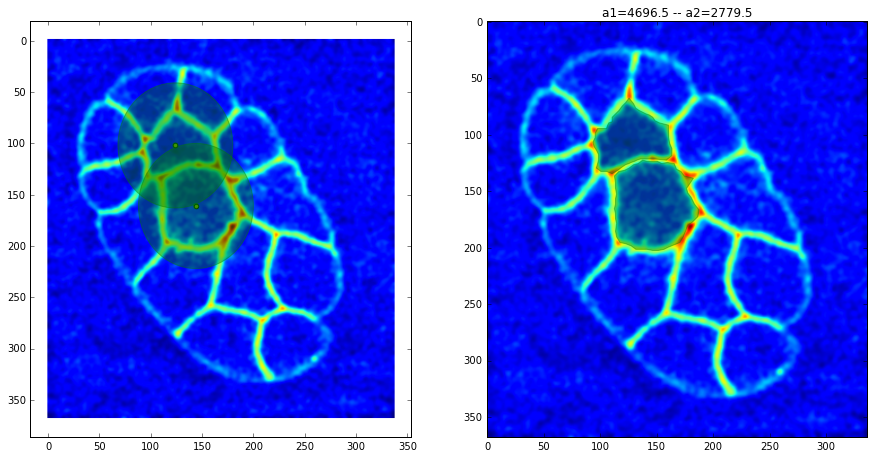

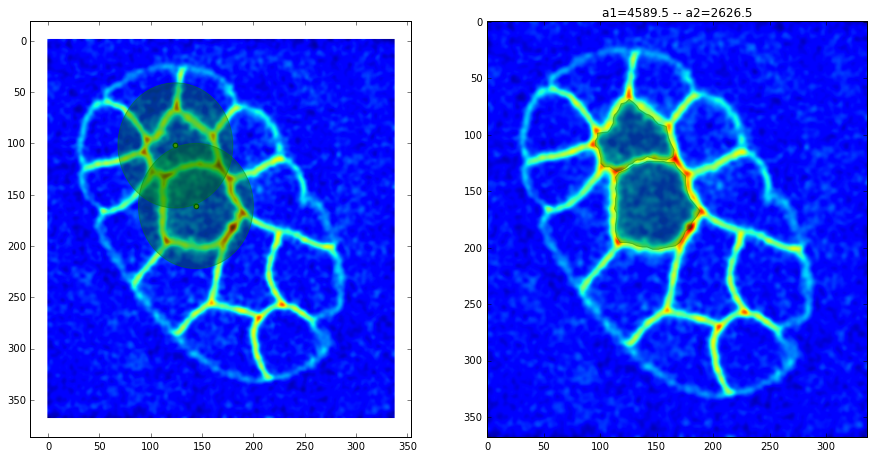

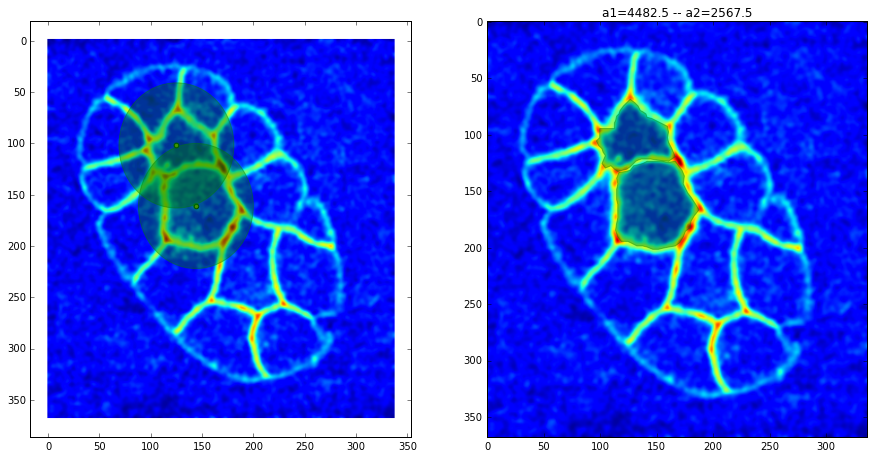

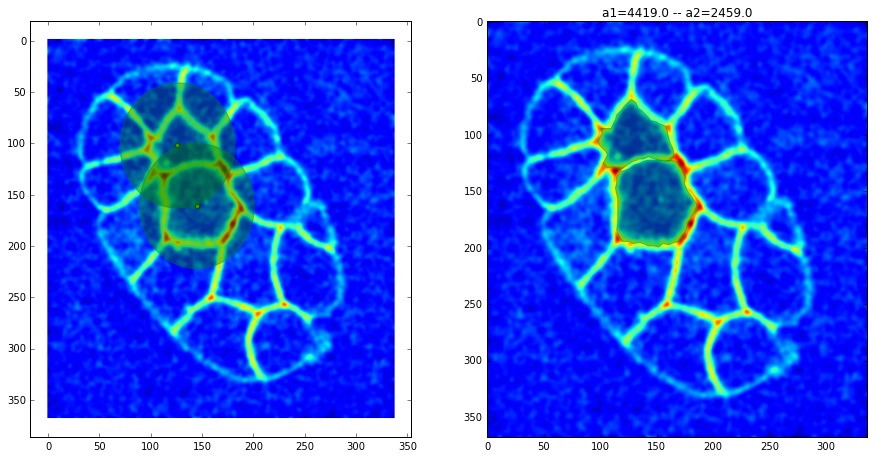

In [15]:
for frame in range(1,19):
    fig = plt.figure()
    ax = plt.subplot(121)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(122)
    ax.set_title('a1='+str(data.object_areas[0][frame])+' -- a2='+str(data.object_areas[1][frame]))
    data.plot_result( frame, ax )

# FLOW

### See the loaded flow channel images...

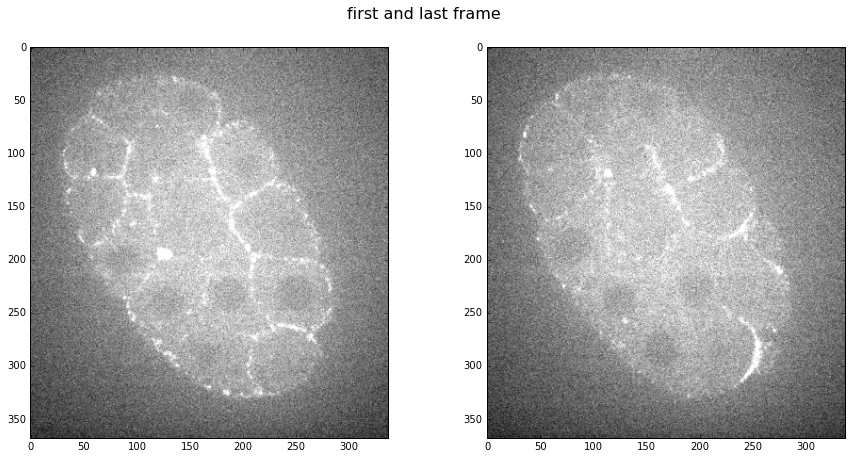

In [24]:
pylab.rcParams['figure.figsize'] = (15, 7)
fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flowchannel[0], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flowchannel[-1], plt.get_cmap('gray'))


In [25]:
prvs = flowchannel[0]
hsv_shape = (prvs.shape[0],prvs.shape[1],3)
hsv = np.zeros(hsv_shape)
hsv[...,1] = 255

dots = data.get_result_polygone(0,0)

In [26]:
def draw_flow(im,flow,step=16, dots=[]):
    h,w = im.shape[:2]
    y,x = mgrid[step/2:h:step,step/2:w:step].reshape(2,-1)
    fx,fy = flow[y,x].T

    # create line endpoints
    lines = vstack([x,y,x+fx,y+fy]).T.reshape(-1,2,2)
    lines = int32(lines)

    # create image and draw
    vis = cv2.cvtColor(im,cv2.COLOR_GRAY2BGR)
    for (x1,y1),(x2,y2) in lines:
        cv2.line(vis,(x1,y1),(x2,y2),(0,255,0),1)
        cv2.circle(vis,(x1,y1),1,(0,255,0), -1)
    
    for dot in dots:
        fx,fy = flow[dot[1],dot[0]].T
        dot = ( dot[0]+fx, dot[1]+fy )
        intdot = ( int(dot[0]), int(dot[1]) )
        cv2.circle(vis,intdot, 1, (0,0,255), -1)
    
    return vis, dots

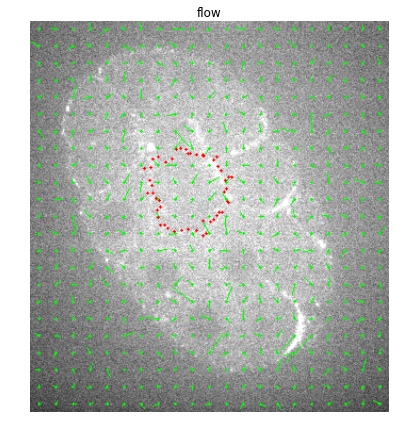

In [35]:
from IPython.display import clear_output

for f in range(flowchannel.shape[0]):
    nxt = flowchannel[f]

    flow = cv2.calcOpticalFlowFarneback(prvs,nxt,0.5,1,3,15,3,5,1)

    outframe, dots = draw_flow(flowchannel[f],flow,dots=dots)
    rgbframe = cv2.cvtColor(outframe, cv2.COLOR_BGR2RGB)
    
    axis('off')
    title("flow")
    imshow(rgbframe)
    show()
    clear_output(wait=True)
    
    k = cv2.waitKey(100) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',nxt)
        cv2.imwrite('opticalhsv.png',rgbframe)
    prvs = nxt

cv2.destroyAllWindows()